# Práctica 5
Integrantes:
- Pineda Hernández Francisco
- Ramirez Aguilar Rodrigo Vidal

In [199]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS

In [200]:
import numpy as np

X_list = []

for t1 in range(0, 21):
    for t2 in range(0, 21):
        v = ((t1*0.1)-1) * ((t2*0.1)-1)
        X_list.append([v, t1*0.1, t2*0.1])

X = np.array(X_list)
X

array([[1. , 0. , 0. ],
       [0.9, 0. , 0.1],
       [0.8, 0. , 0.2],
       ...,
       [0.8, 2. , 1.8],
       [0.9, 2. , 1.9],
       [1. , 2. , 2. ]], shape=(441, 3))

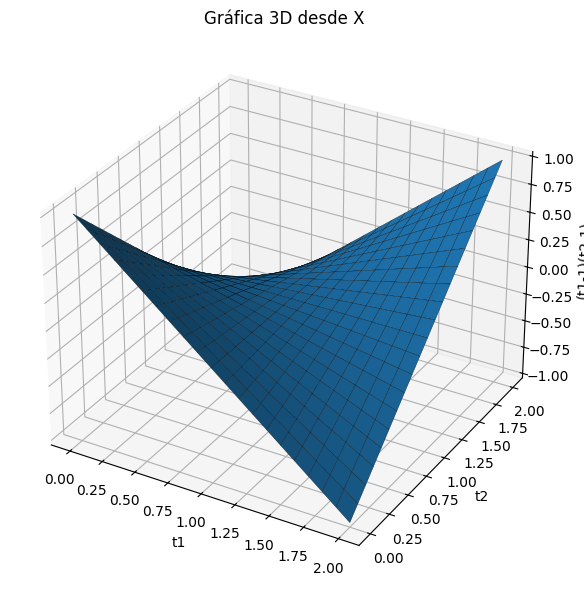

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

def plot_from_X(X, kind='surface', elev=30, azim=-60):
    """
    Grafica en 3D el dataset X de forma (n,3) donde cada fila es [z, t1, t2].
    kind: 'surface' o 'scatter'.
    elev, azim: ángulo de elevación y azimut para visualizar la gráfica.
    """
    X = np.asarray(X)
    if X.ndim != 2 or X.shape[1] != 3:
        raise ValueError("X debe ser un array de forma (n,3) con columnas [z, t1, t2].")

    z = X[:, 0]
    t1 = X[:, 1]
    t2 = X[:, 2]

    t1u = np.unique(t1)
    t2u = np.unique(t2)

    # construir diccionario (t1,t2) -> z para rellenar la malla
    z_dict = {(float(a), float(b)): float(c) for a, b, c in zip(t1, t2, z)}

    T1, T2 = np.meshgrid(t1u, t2u)  # forma (len(t2u), len(t1u))
    Z = np.zeros_like(T1, dtype=float)

    for i, tt2 in enumerate(t2u):
        for j, tt1 in enumerate(t1u):
            Z[i, j] = z_dict.get((float(tt1), float(tt2)), np.nan)

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev, azim=azim)

    if kind == 'surface':
        # surface plot
        surf = ax.plot_surface(T1, T2, Z, rstride=1, cstride=1, edgecolor='k', linewidth=0.2)
    elif kind == 'scatter':
        ax.scatter(T1.ravel(), T2.ravel(), Z.ravel(), s=20)
    else:
        raise ValueError("kind debe ser 'surface' o 'scatter'.")

    ax.set_xlabel('t1')
    ax.set_ylabel('t2')
    ax.set_zlabel('(t1-1)(t2-1)')
    ax.set_title('Gráfica 3D desde X')
    plt.tight_layout()
    plt.show()

# Ejemplo de uso (si ya tienes X):
plot_from_X(X, kind='surface')
# o
# plot_from_X(X, kind='


In [202]:
media_X = np.mean(X, axis=0)        
#autovalores, autovectores = np.linalg.eig(X)
X_media = X - media_X

In [203]:
X_media_T = X_media.T

In [204]:
X_cuadrada =  X_media @ X_media_T

In [205]:
n = X.shape[0]
cov = (X_media.T @ X_media) / (n - 1)
autovalores, autovectores = np.linalg.eigh(X_cuadrada)

In [206]:
com_x = np.argsort(autovalores)[::-1]
autovalores = autovalores[com_x]
autovectores = autovectores[:, com_x]

print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)

Autovalores: [ 1.61700000e+02  1.61700000e+02  5.92900000e+01  5.61552591e-14
  5.52739430e-14  4.10278761e-14  3.64063261e-14  3.23809050e-14
  3.08464527e-14  3.02634697e-14  2.36461674e-14  2.25701416e-14
  1.81018105e-14  1.73065686e-14  1.10190883e-14  9.90327638e-15
  9.78434337e-15  8.69373060e-15  8.27486267e-15  8.02280297e-15
  7.84410949e-15  6.74291706e-15  6.28457263e-15  5.81883547e-15
  5.56895590e-15  5.39827345e-15  4.93040464e-15  4.80025483e-15
  3.96419561e-15  3.89982634e-15  3.88688555e-15  3.78323345e-15
  3.62550332e-15  3.57032604e-15  3.47032829e-15  3.46428913e-15
  3.13921616e-15  3.13779956e-15  3.10757713e-15  3.09859668e-15
  3.07987077e-15  3.00102497e-15  2.97373767e-15  2.83943592e-15
  2.80877401e-15  2.78095024e-15  2.70967839e-15  2.69806096e-15
  2.61323268e-15  2.59295523e-15  2.56173359e-15  2.52323481e-15
  2.47979905e-15  2.40454267e-15  2.39049107e-15  2.34589630e-15
  2.33803661e-15  2.33385680e-15  2.23606251e-15  2.20272402e-15
  2.17500917

In [207]:
autovalores.shape

(441,)

In [208]:
Lambda = np.array([[np.sqrt(autovalores[0]), 0], [0, np.sqrt(autovalores[1])]])

In [209]:
Q = autovectores[:, :2]
print(Q)
Y = Q @ Lambda
Y

[[-1.10765687e-01  9.97729452e-03]
 [-1.05726267e-01  3.94014545e-03]
 [-1.00686848e-01 -2.09700362e-03]
 [-9.56474280e-02 -8.13415269e-03]
 [-9.06080084e-02 -1.41713018e-02]
 [-8.55685888e-02 -2.02084508e-02]
 [-8.05291692e-02 -2.62455999e-02]
 [-7.54897496e-02 -3.22827490e-02]
 [-7.04503299e-02 -3.83198980e-02]
 [-6.54109103e-02 -4.43570471e-02]
 [-6.03714907e-02 -5.03941962e-02]
 [-5.53320711e-02 -5.64313453e-02]
 [-5.02926515e-02 -6.24684943e-02]
 [-4.52532318e-02 -6.85056434e-02]
 [-4.02138122e-02 -7.45427925e-02]
 [-3.51743926e-02 -8.05799415e-02]
 [-3.01349730e-02 -8.66170906e-02]
 [-2.50955534e-02 -9.26542397e-02]
 [-2.00561338e-02 -9.86913887e-02]
 [-1.50167141e-02 -1.04728538e-01]
 [-9.97729452e-03 -1.10765687e-01]
 [-1.04728538e-01  1.50167141e-02]
 [-9.96891182e-02  8.97956507e-03]
 [-9.46496986e-02  2.94241600e-03]
 [-8.96102790e-02 -3.09473307e-03]
 [-8.45708593e-02 -9.13188214e-03]
 [-7.95314397e-02 -1.51690312e-02]
 [-7.44920201e-02 -2.12061803e-02]
 [-6.94526005e-02 -2

array([[-1.40851104e+00,  1.26872589e-01],
       [-1.34442912e+00,  5.01034077e-02],
       [-1.28034719e+00, -2.66657737e-02],
       [-1.21626527e+00, -1.03434955e-01],
       [-1.15218335e+00, -1.80204137e-01],
       [-1.08810143e+00, -2.56973318e-01],
       [-1.02401950e+00, -3.33742499e-01],
       [-9.59937581e-01, -4.10511681e-01],
       [-8.95855659e-01, -4.87280862e-01],
       [-8.31773736e-01, -5.64050043e-01],
       [-7.67691814e-01, -6.40819225e-01],
       [-7.03609891e-01, -7.17588406e-01],
       [-6.39527969e-01, -7.94357588e-01],
       [-5.75446046e-01, -8.71126769e-01],
       [-5.11364124e-01, -9.47895950e-01],
       [-4.47282201e-01, -1.02466513e+00],
       [-3.83200279e-01, -1.10143431e+00],
       [-3.19118356e-01, -1.17820349e+00],
       [-2.55036434e-01, -1.25497268e+00],
       [-1.90954512e-01, -1.33174186e+00],
       [-1.26872589e-01, -1.40851104e+00],
       [-1.33174186e+00,  1.90954512e-01],
       [-1.26765993e+00,  1.14185330e-01],
       [-1.

In [210]:
print("Shape de Y:", Y.shape)
print("Primeras filas de Y:\n", Y[:5])
print("Varianza explicada por PC1 y PC2:", autovalores[:2] / autovalores.sum())

Shape de Y: (441, 2)
Primeras filas de Y:
 [[-1.40851104  0.12687259]
 [-1.34442912  0.05010341]
 [-1.28034719 -0.02666577]
 [-1.21626527 -0.10343496]
 [-1.15218335 -0.18020414]]
Varianza explicada por PC1 y PC2: [0.42253521 0.42253521]


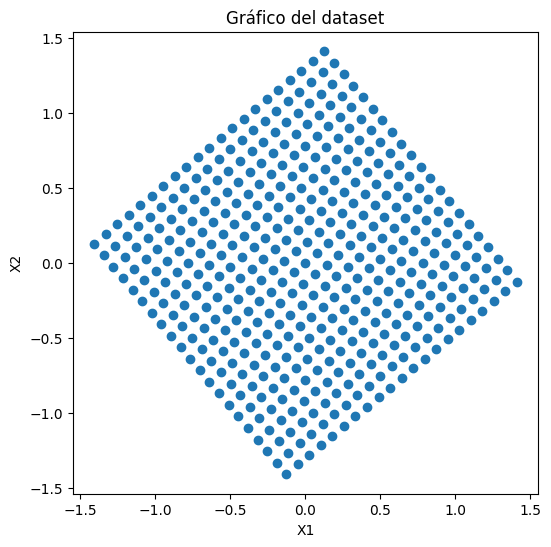

In [211]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dataset(X):
    """
    Grafica un conjunto de puntos 2D dado en un array Nx2.
    """
    X = np.array(X)

    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1])  # sin colores ni estilos definidos
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Gráfico del dataset")
    plt.axis("equal")  # para que no se distorsione la forma
    plt.show()

# Ejemplo de uso:
plot_dataset(Y)
